In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import gaussian_process as gp

%matplotlib notebook

# 1D Example

## The ground truth function

In [38]:
def f(x):
    #return np.sin(x) + np.cos(x)*x
    return np.sin(x)
    #return np.sin(x)*x + np.cos(2*x)

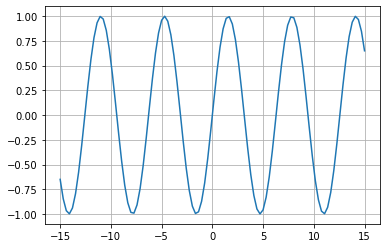

In [39]:
x = np.linspace(-15, 15, 100)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.show()


## Gaussian Process Regressor

Score: 0.14051548913109635
Score: 0.42548554166013586
Score: 0.6637260050511744
Score: 0.7893612519438793


/usr/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


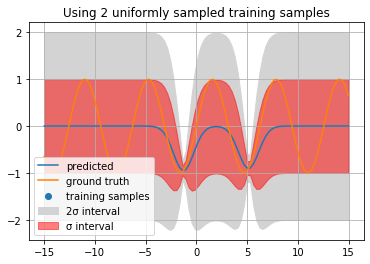

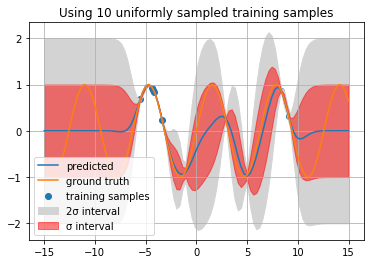

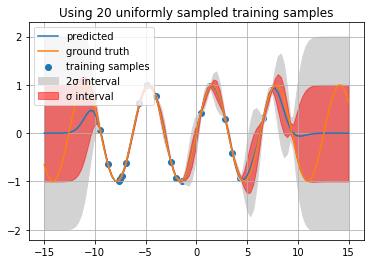

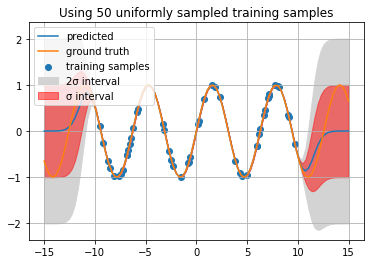

In [40]:
gpr = gp.GaussianProcessRegressor()

for n in [2, 10, 20, 50]:
    plt.figure()
    plt.title(f"Using {n} uniformly sampled training samples")
    
    x_train = np.random.uniform(-10, 10, size=n)
    y_train = f(x_train)

    plt.scatter(x_train, y_train, label='training samples')

    gpr.fit(x_train.reshape(-1, 1), y_train)
    print(f"Score: {gpr.score(x.reshape(-1, 1), y)}")

    y_predicted, sigma = gpr.predict(x.reshape(-1, 1), return_std=True)
    plt.plot(x, y_predicted, label='predicted')
    
    plt.fill_between(x, y_predicted - 2*sigma, y_predicted+2*sigma, label='2σ interval', color='lightgray')
    plt.fill_between(x, y_predicted - sigma, y_predicted+sigma, label='σ interval', color=(1, 0, 0, 0.5))
    plt.plot(x, y, label='ground truth')
    plt.legend()
    plt.grid()